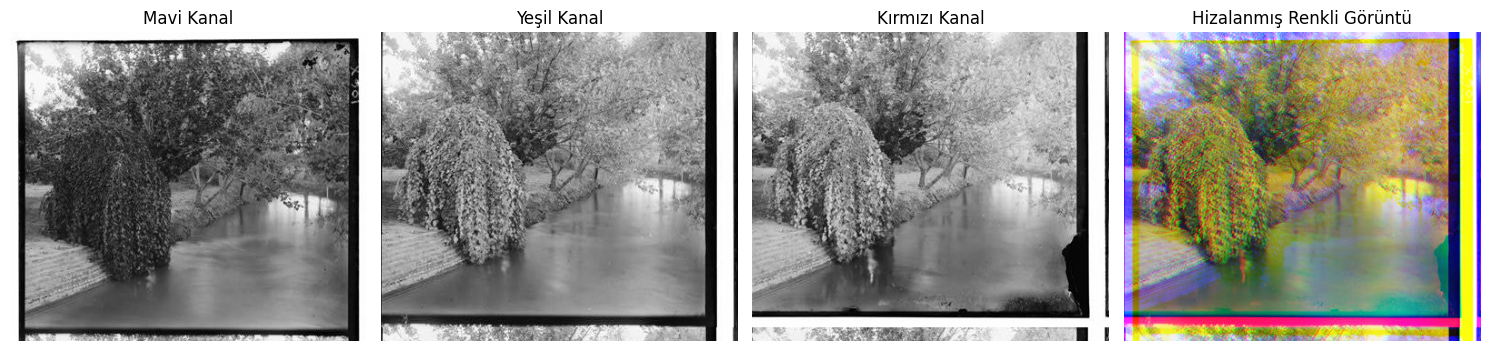

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kanallari_hizala(gri_goruntu, kaydirma_araligi=15):

    yukseklik = gri_goruntu.shape[0] // 3
    mavi = gri_goruntu[:yukseklik, :]
    yesil = gri_goruntu[yukseklik:2*yukseklik, :]
    kirmizi = gri_goruntu[2*yukseklik:3*yukseklik, :]


    def hizala(kanal, referans, kaydirma_araligi):
        en_iyi_kayma = (0, 0)
        en_az_fark = float('inf')


        for dx in range(-kaydirma_araligi, kaydirma_araligi + 1):
            for dy in range(-kaydirma_araligi, kaydirma_araligi + 1):

                kaydirilmis_kanal = np.roll(kanal, (dy, dx), axis=(0, 1))

                fark = np.sum(np.abs(referans - kaydirilmis_kanal))

                if fark < en_az_fark:
                    en_az_fark = fark
                    en_iyi_kayma = (dy, dx)


        return np.roll(kanal, en_iyi_kayma, axis=(0, 1))


    yesil = hizala(yesil, mavi, kaydirma_araligi)
    kirmizi = hizala(kirmizi, mavi, kaydirma_araligi)

    return mavi, yesil, kirmizi

def main():

    goruntu_yolu = '/content/photo.jpg'
    gri_goruntu = cv2.imread(goruntu_yolu, cv2.IMREAD_GRAYSCALE)

    if gri_goruntu is None:
        print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
        return


    mavi, yesil, kirmizi = kanallari_hizala(gri_goruntu)


    hizali_renkli = cv2.merge([mavi, yesil, kirmizi])


    plt.figure(figsize=(15, 5))


    plt.subplot(1, 4, 1)
    plt.imshow(mavi, cmap='gray')
    plt.title("Mavi Kanal")
    plt.axis('off')


    plt.subplot(1, 4, 2)
    plt.imshow(yesil, cmap='gray')
    plt.title("Yeşil Kanal")
    plt.axis('off')


    plt.subplot(1, 4, 3)
    plt.imshow(kirmizi, cmap='gray')
    plt.title("Kırmızı Kanal")
    plt.axis('off')


    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(hizali_renkli, cv2.COLOR_BGR2RGB))
    plt.title("Hizalanmış Renkli Görüntü")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()